In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Sensor Calibration

In [20]:
#Pressure Calculation

U_L, U_t = 97.45, -37.65 #mV
p_L, p_t = 95818.8, 13.3322 #Pa

C = (p_L - p_t)/(U_L - U_t)
print("C =", C)

p_0 = p_t - C*U_t
print("p0 =", p_0)

def calcPressure(U):
    return p_0 + U*C

C = 709.1448393782383
p0 = 26712.635402590673


In [21]:
#Pressure Error Calculation

delta_U = 0.15508 #mV
delta_p_L = 200 #Pa
delta_p_t = 13.22 #Pa

delta_C = math.sqrt(math.pow(delta_p_L/(U_L - U_t), 2) + math.pow(-1/(U_L - U_t)*delta_p_t, 2) + math.pow(-(p_L-p_t)/math.pow((U_L-U_t),2)*delta_U, 2) + math.pow((p_L-p_t)/math.pow(U_L-U_t,2)*delta_U, 2))
print("Delta C =", delta_C)

delta_p_0 = math.sqrt(math.pow(-U_t*delta_C, 2) + math.pow(-C*delta_U, 2) + math.pow(delta_p_t,2))
print("Delta p0 =", delta_p_0)

def calcPressureError(U):
    return math.sqrt(math.pow(U*delta_C, 2) + math.pow(C*delta_U, 2) + math.pow(delta_p_0, 2))

Delta C = 1.8778641564039038
Delta p0 = 131.40701362240478


## Absolute Zero Calculations

In [22]:
#Absolute Zero Pressures

t_K, t_E = 98.323, 0.0 #C
U_K, U_E = 95.64, 60.74 #mV

p_K = calcPressure(U_K) #Pa
p_E = calcPressure(U_E) #Pa
print("pE =", p_E)
print("pK =", p_K)

dlta_pe = calcPressureError(U_E)
dlta_pk = calcPressureError(U_K)
print("Delta pE =", dlta_pe)
print("Delta pK =", dlta_pk)

pE = 69786.09294642488
pK = 94535.2478407254
Delta pE = 205.84494782775107
Delta pK = 248.22952841509107


In [23]:
#Approximate t_0

def approx_t0(p_E, p_K, t_K):
    return -p_E/(p_K - p_E)*t_K

t_0a = approx_t0(p_E, p_K, t_K)
print("Approximate t0 =", t_0a)

Approximate t0 = -277.2449421435188


In [24]:
#Calculate t_0

t_L = 24 #C
epsilon = 1*math.pow(10,-3)
gamma = 1*math.pow(10,-5)

a = (1 + epsilon)*p_E - (1 + epsilon + gamma*t_K)*p_K
b = epsilon*(p_K - p_E)*t_K + (1 + gamma*t_K)*p_K*t_L - p_E*(t_L + t_K)
c = p_E*t_L*t_K

t_0 = (-b + math.sqrt(math.pow(b, 2) - 4*a*c))/2/a
print("t0 =", t_0)

t0 = -275.8646438575216


In [25]:
#Calculate t_0 error

# partial derivatives of coeffitients
del_a_pk = -1 - epsilon - gamma * t_K
del_b_pk = epsilon * t_K + t_L * (1 + gamma * t_K)
del_c_pk = 0
del_a_pe = 1 + epsilon
del_b_pe = - epsilon * t_K - t_L - t_K
del_c_pe = t_L * t_K

# partial derivative of t0 nach pe
del_t0_pe_PP = (2 * a * (-del_b_pe + 1/np.sqrt(np.square(b) - 4 * a * c) * (del_b_pe - 4 * (del_a_pe * c + a * del_c_pe))) - 2 * del_a_pe * (-b + np.sqrt(np.square(b) - 4 * a * c)))/ (4 * np.square(a))

# partial derivative of t0 nach pk
del_t0_pk_PP = (2 * a * (-del_b_pk + 1/np.sqrt(np.square(b) - 4 * a * c) * (del_b_pk - 4 * (del_a_pk * c + a * del_c_pk))) - 2 * del_a_pk * (-b + np.sqrt(np.square(b) - 4 * a * c)))/ (4 * np.square(a))

del_t0_pe = del_t0_pe_PP
del_t0_pk = del_t0_pk_PP

# compute delta t0 using gaussian error propagation
dlta_t0 = np.sqrt(np.square(del_t0_pk * dlta_pk) + np.square(del_t0_pe * dlta_pe))
print("Delta t0 =", dlta_t0)

Delta t0 = 3.532792849638872


## Liquid Nitrogen Calculations

In [26]:
#Calculate t_LN2

U_N = -9.98 #mV
p_N = calcPressure(U_N) #Pa

A = p_E/(0 - t_0) + epsilon*(p_E - p_N)/(t_L - t_0)
t_LN2 = (A*t_0 + p_N)/(A - gamma*p_N)
print("tLN2 =", t_LN2)

tLN2 = -198.45117979068436


In [27]:
#Calculate dlta_pn

dlta_pn = calcPressureError(U_N)

dlta_A = math.sqrt(math.pow((1/(t_E-t_0) + epsilon/(t_L-t_0))*dlta_pe, 2) + math.pow(-epsilon/(t_L-t_0)*dlta_pn, 2) + math.pow((p_E*math.pow(t_E-t_0, -2) + epsilon*(p_E-p_N)*math.pow(t_L-t_0, -2))*dlta_t0, 2))

dlta_tN = math.sqrt(math.pow(p_N*(1+gamma*t_0)/math.pow(-gamma*p_N+A, 2)*dlta_A, 2) + math.pow(A/(A-gamma*p_N)*dlta_t0, 2) + math.pow(A*(gamma*t_0 + 1)/math.pow(gamma*p_N - A, 2)*dlta_pn, 2))
print("Delta tLN2 =", dlta_tN)

Delta tLN2 = 3.741534613864315


## Plots

In [28]:
dpi = 200

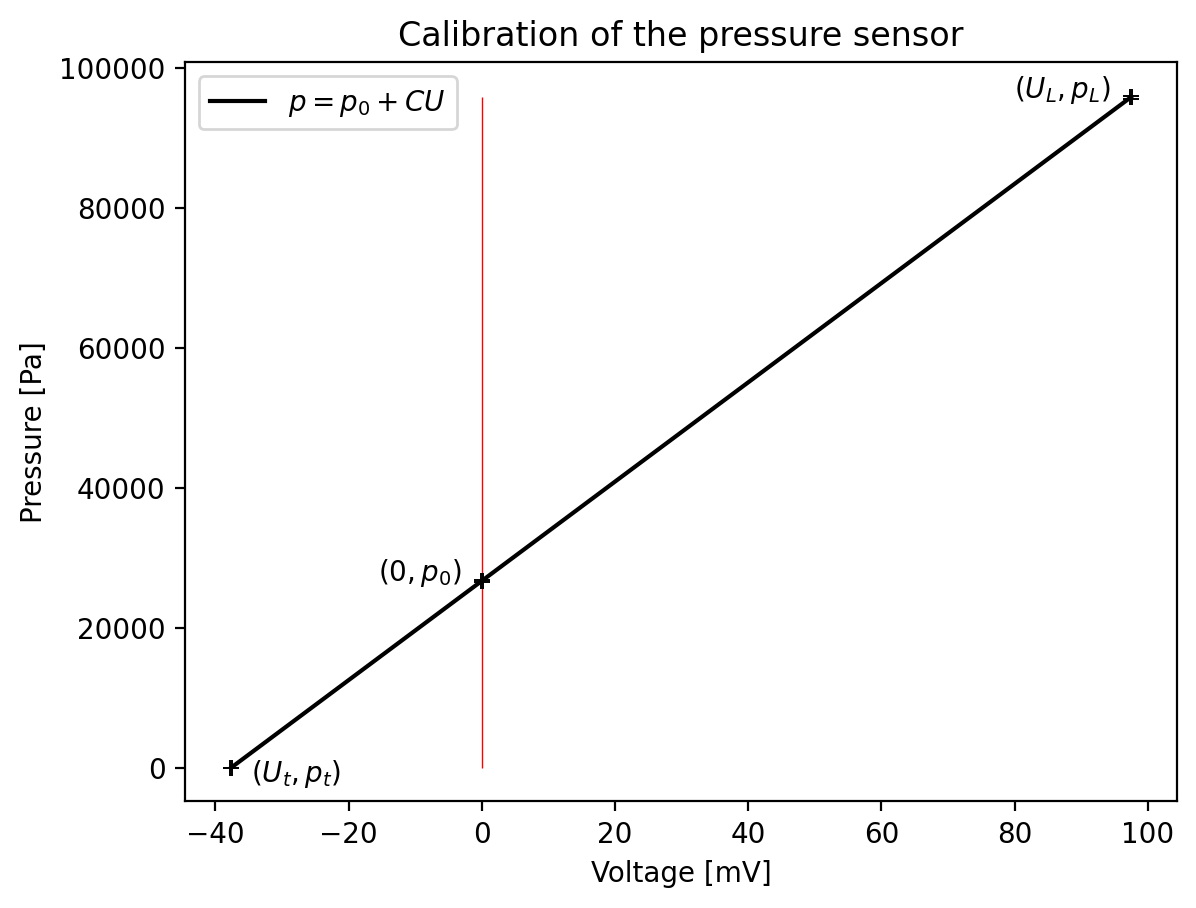

In [29]:
fig,ax1 = plt.subplots(dpi=dpi)

ax1.set_title('Calibration of the pressure sensor')
ax1.set_xlabel('Voltage [mV]')
ax1.set_ylabel('Pressure [Pa]')

U = [U_L, U_t]
P = [p_L, p_t]

ax1.plot(U, P, c='black', marker = None, linestyle='-', label = '$p = p_0 + CU$')
ax1.vlines(0, P[0], P[1], colors='red', linestyle = '-', linewidth=0.5)

ax1.annotate("$(0, p_0)$", (-3, p_0), horizontalalignment='right')
ax1.errorbar([0], [p_0], xerr = delta_U, yerr = delta_p_0, ecolor = "black", capsize=3, markeredgewidth=0.7, elinewidth=1)

ax1.annotate("$(U_L, p_L)$", (U[0] - 3, P[0]), horizontalalignment='right')
ax1.errorbar(U[0], P[0], xerr = delta_U, yerr = delta_p_L, ecolor = "black", capsize=3, markeredgewidth=0.7, elinewidth=1)

ax1.annotate("$(U_t, p_t)$", (U[1] + 3, P[1] - 2000))
ax1.errorbar(U[1], P[1], xerr = delta_U, yerr = delta_p_t, ecolor = "black", capsize=3, markeredgewidth=0.7, elinewidth=1)

plt.legend()

Text(88.323, 93535.2478407254, '$(t_K, p_K)$')

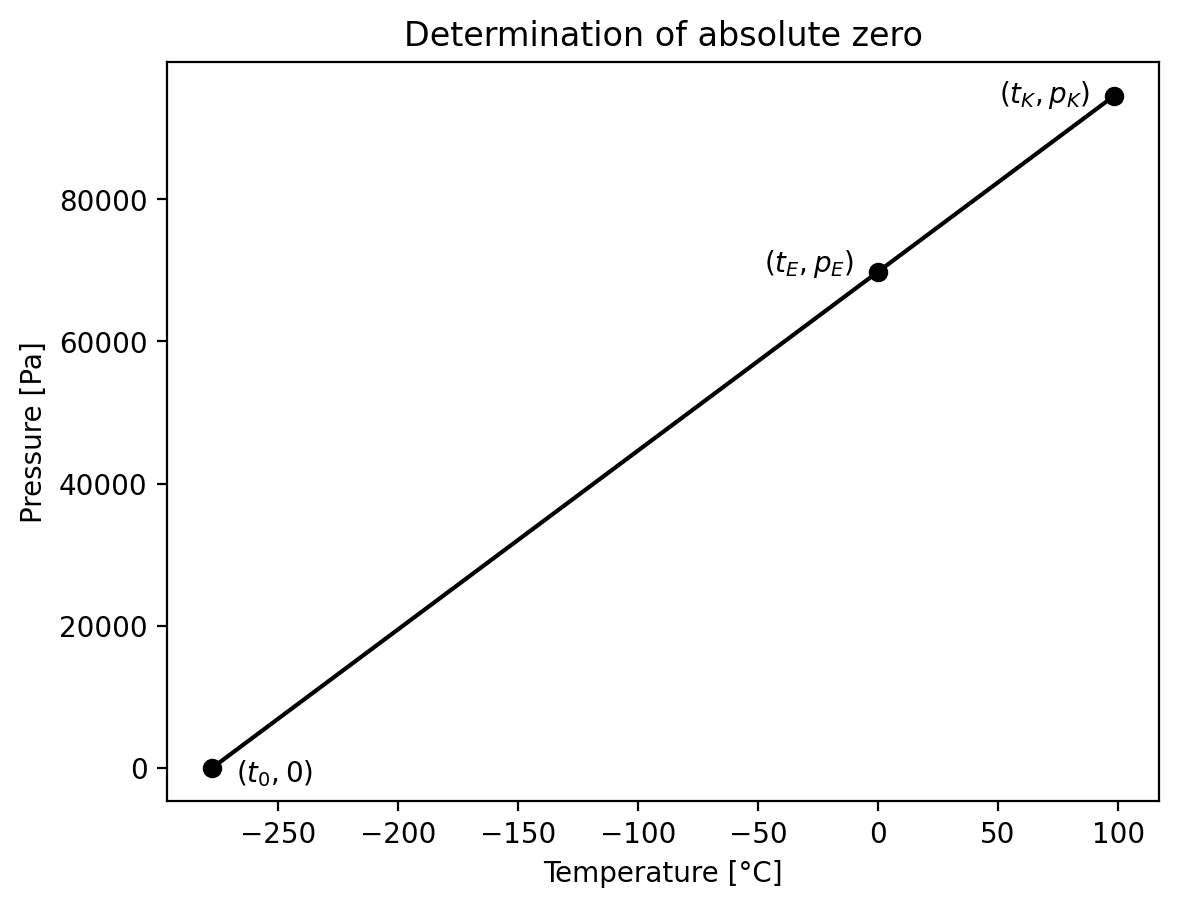

In [32]:
fig,ax1 = plt.subplots(dpi=dpi)

ax1.set_title('Determination of absolute zero')
ax1.set_xlabel('Temperature [°C]')
ax1.set_ylabel('Pressure [Pa]')

P = [0, p_E, p_K]
T = [t_0a, t_E, t_K]

ax1.plot(T,P,c='black',linestyle='-', marker = 'o', label = 'adapt')
ax1.annotate("$(t_0, 0)$", (T[0] + 10, P[0] - 2000))
ax1.annotate("$(t_E, p_E)$", (T[1] - 10, P[1]), horizontalalignment='right')
ax1.annotate("$(t_K, p_K)$", (T[2] - 10, P[2] - 1000), horizontalalignment='right')